## Import Modules

In [19]:
# Data Processing
import numpy as np 
import pandas as pd
import scipy as sp
from functools import reduce

# Dim Reduction
from sklearn.decomposition import PCA

# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

#get inline plots
%matplotlib inline 


## Helper Functions

1. Generate Outliers
2. Generate Inliers
3. Create Zscore

In [20]:
def gen_outlier(n):
    whole = np.random.uniform(2,3, n)
    negative = np.random.uniform(0,1,n) < .5
    values = np.multiply(negative*(-2)+1,whole)
    return  values

def gen_outlier_frame(n,m):
    col_names = ['feature_' + str(i) for i in np.arange(1,m+1)]
    frame_out = pd.DataFrame(
        [list(gen_outlier(i)) for i in n*[m]], 
    columns = col_names)
    return frame_out

def gen_inlier_frame(n,m):
    col_names = ['feature_' + str(i) for i in np.arange(1,m+1)]
    frame_out = pd.DataFrame(np.random.normal(0,1, size = (n,m)), columns=col_names)
    return frame_out

def zscore(x):
    return (x - np.mean(x))/np.std(x)

## Generate Data

In [3]:
n_features = 8
outlier_n = 10
inlier_n = 10000

In [4]:
outlier = gen_outlier_frame(outlier_n,n_features)
inlier = gen_inlier_frame(inlier_n,n_features)

inlier['label'] = 'inlier'
outlier['label'] = 'outlier'
df = outlier.append(inlier)
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,label
0,-2.117650,-2.642335,2.019574,2.743555,-2.028423,-2.789368,2.014738,2.539163,outlier
1,2.648965,-2.610878,2.446556,2.653840,-2.861705,2.704566,-2.524487,2.446348,outlier
2,2.904228,-2.681673,-2.689122,2.609011,2.855279,2.832426,-2.257467,2.184020,outlier
3,-2.347969,-2.119747,2.154113,2.849903,2.420463,-2.428119,-2.269481,2.074844,outlier
4,-2.278132,2.811301,-2.989289,2.380086,-2.427363,-2.100004,2.654726,2.279454,outlier


## Plot Densities
- Plot Inlier Kernal Density Plot - Green
- Plot Inlier Kernal Density Plot - Red

C:\Users\Cglan\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


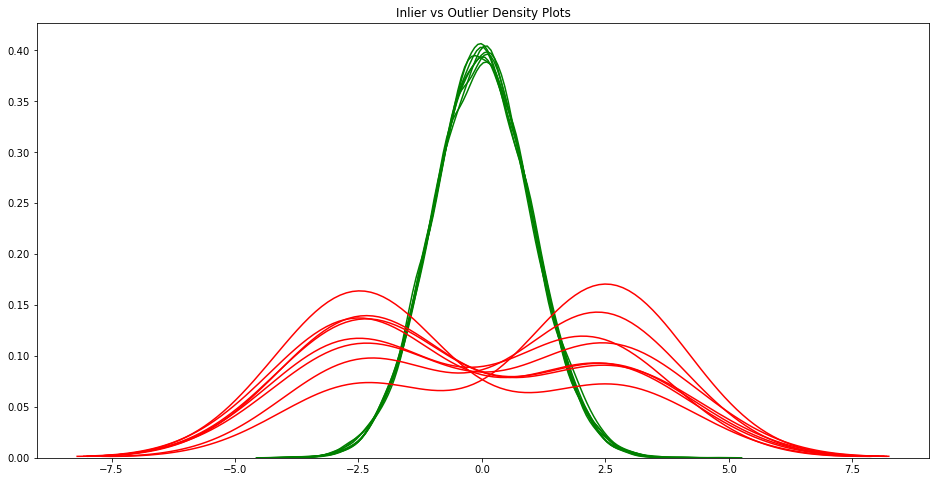

In [5]:
plt.figure(figsize=(16,8))
_ = inlier.drop('label',1).apply(lambda x: sns.kdeplot(x, color='green', legend = False), 0)
_ = outlier.drop('label',1).apply(lambda x: sns.kdeplot(x, color = 'red', legend = False), 0)
_ = plt.title('Inlier vs Outlier Density Plots')

## Get Probabilities
1. Create zscore for each column
2. Get Probabilities for each column
3. Get Joint Probabilities by multiplying P(Feature 1) * P(Feature 2) * P(Feature 3)
    - Note, this assumes independence assumption

In [6]:
df_zscore = df.drop('label',1).apply(zscore,0)
df_p = df_zscore.apply(lambda x: np.round(sp.stats.norm.sf(np.abs(x)),5),1)
df['prob'] = round(df_p.apply(np.prod,1)*100,100)
df.head(20)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,label,prob
0,-2.117650,-2.642335,2.019574,2.743555,-2.028423,-2.789368,2.014738,2.539163,outlier,3.740251e-15
1,2.648965,-2.610878,2.446556,2.653840,-2.861705,2.704566,-2.524487,2.446348,outlier,1.645378e-17
2,2.904228,-2.681673,-2.689122,2.609011,2.855279,2.832426,-2.257467,2.184020,outlier,1.025340e-17
3,-2.347969,-2.119747,2.154113,2.849903,2.420463,-2.428119,-2.269481,2.074844,outlier,8.989606e-15
4,-2.278132,2.811301,-2.989289,2.380086,-2.427363,-2.100004,2.654726,2.279454,outlier,2.250963e-16
5,2.010140,-2.701187,-2.926730,-2.487523,2.396711,-2.351211,-2.428856,-2.408517,outlier,4.000168e-16
6,2.976914,2.356541,2.019099,-2.003967,-2.414000,-2.963802,2.974429,-2.543658,outlier,6.289861e-17
7,-2.736157,2.395088,-2.124316,-2.836537,2.847388,2.424443,2.588889,-2.429333,outlier,7.274137e-17
8,-2.367687,-2.563885,2.188791,2.202677,2.291855,-2.640334,-2.418148,2.908323,outlier,6.693930e-16
9,-2.624196,2.319940,-2.296550,2.284465,-2.570061,-2.219085,-2.531139,-2.134207,outlier,3.700006e-15


## Visualizing Outliers in 2D
- Reduce N_features into two Components 
- Prepare dataframe for plotting

In [7]:
two_dim = PCA(n_components= 2)
two_dim.fit(df.drop(['prob','label'],1).T)
two_dim_frame = pd.DataFrame(two_dim.components_.T, columns= ['PCA1','PCA2'])
two_dim_frame.head(10)

,PCA1,PCA2
0,0.024395,-0.008194
1,0.028150,-0.019148
2,0.035536,0.004354
3,0.043023,0.024726
4,0.021933,-0.009516
5,-0.010828,0.018533
6,-0.050107,-0.016644
7,-0.031382,0.005410
8,0.042399,0.032108
9,0.029994,-0.016017


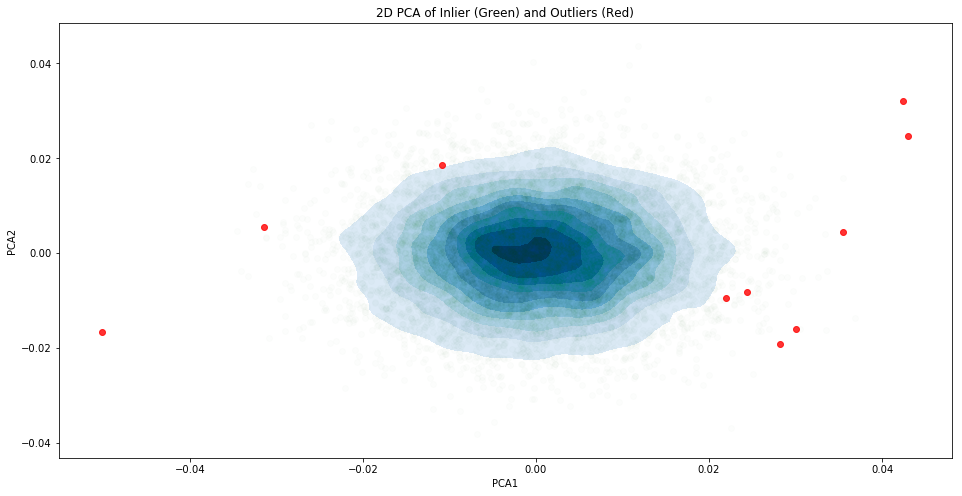

In [8]:
# set size
plt.figure(figsize=(16,8))

# Plot 1: Bi-Variate Density plot
sns.kdeplot(two_dim_frame['PCA1'], two_dim_frame['PCA2'], cmap="Blues", shade=True, shade_lowest=False, )

# Plot 2: Green Dots (inliers)
sns.regplot(x="PCA1", y="PCA2", data=two_dim_frame.iloc[0:10,],fit_reg=False,color='r')

# Plot 3: Red Dots (Outliers)
sns.regplot(x="PCA1", y="PCA2", data=two_dim_frame.iloc[11:,],fit_reg=False,color='g',scatter_kws={'alpha':0.01})

# Title
plt.title('2D PCA of Inlier (Green) and Outliers (Red)')

## Selecting an Epsilon

- Look at the probabilities of each group to select an episilon

In [9]:
df.pivot_table(
    index = 'label',
    aggfunc=[np.min, np.max],
    values = 'prob').apply(
    lambda x: np.round(x*100, decimals = 8))

,amin,amax
label,,
inlier,0.0,6.69134
outlier,0.0,0.00000


In [10]:
epsilon = df[df.label == 'outlier'].prob.max()

In [11]:
df['pred'] =  ['outlier' if i<=epsilon else 'inlier' for i in df.prob]
df.pred = pd.Series(df.pred)

In [12]:
confusion_matrix(y_true = df.label, y_pred = df.pred)

array([[9999,    1],
       [   0,   10]])

## Real Data

In [27]:
df_hw = pd.read_csv('C:/Users/Cglan/Desktop/github/civicu-machine-learning/lessons/shared-resources/heights_weights_genders.csv')

In [28]:
df_hw = df_hw.ix[:,1:3]

C:\Users\Cglan\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


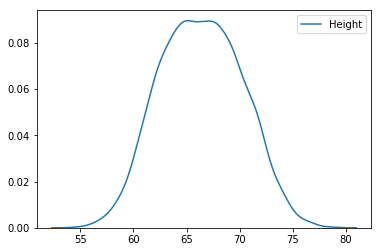

In [36]:
sns.kdeplot(df_hw.Height)

C:\Users\Cglan\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


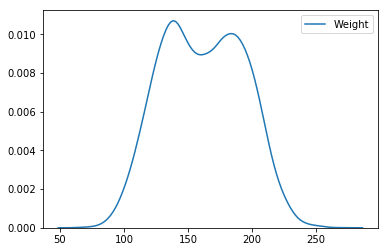

In [39]:
sns.kdeplot(df_hw.Weight)

In [21]:
df_hw_zscore = df_hw.apply(zscore,0)
df_hw_p = df_hw_zscore.apply(lambda x: np.round(sp.stats.norm.sf(np.abs(x)),5),1)
df_hw['prob'] = round(df_hw_p.apply(np.prod,1)*100,100)
df_hw.head(20)

,Height,Weight,prob
0,73.847017,241.893563,0.015849
1,68.781904,162.310473,12.970873
2,74.110105,212.740856,0.121583
3,71.730978,220.042470,0.277447
4,69.881796,206.349801,1.461048
5,67.253016,152.212156,15.823414
6,68.785081,183.927889,6.405858
7,68.348516,167.971110,12.721125
8,67.018950,175.929440,14.103867
9,63.456494,156.399676,9.830258


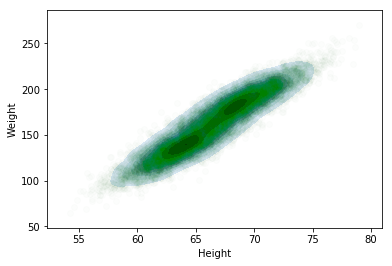

In [50]:

sns.kdeplot(df_hw.Height, df_hw.Weight, cmap="Blues", shade=True, shade_lowest=False)

# Plot 3: Red Dots (Outliers)
sns.regplot(x="Height", y="Weight", data=df_hw,fit_reg=False,color='g',scatter_kws={'alpha':0.01})
